# 1. PROYECTO FINAL

# 1. Análisis y exploración de los datos
## 1.1 Carga y exploración del conjunto de datos

En esta sección cargaremos el dataset `eda_data.csv` y visualizaremos sus primeras filas para entender la estructura del archivo. También revisaremos su tamaño (número de filas y columnas) y el tipo de cada variable. Este paso es esencial para conocer nuestro punto de partida y planificar los análisis posteriores.


In [134]:
# Carga de las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from tensorflow.keras.callbacks import EarlyStopping


A continuacion cargamos el dataset eda_data.csv, que contiene información de distintas ofertas laborales en el área de Ciencia de Datos.
Lo primero que hacemos es revisar las primeras filas para entender su estructura.
Vemos que incluye datos como el título del puesto, el salario estimado, la empresa, el año de fundación y si se requieren herramientas como Python, R o Spark.
Esto nos ayuda a identificar las variables que podríamos usar más adelante para entrenar el modelo y predecir rangos salariales.”

In [135]:
# Cargar el dataset
df = pd.read_csv("Dataset/eda_data.csv")
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,47,1,0,0,0,1,data scientist,na,2536,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,36,1,0,0,0,0,data scientist,na,4783,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,10,1,0,1,0,1,data scientist,na,3461,0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,55,1,0,0,0,0,data scientist,na,3883,3
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,22,1,0,0,0,1,data scientist,na,2728,3


### Exploración del tamaño y tipos de datos

- Aquí analizamos el tamaño del dataset y comprobamos que tiene 742 filas y 33 columnas, es decir, 742 registros de ofertas laborales.
- También revisamos el tipo de datos de cada columna, lo cual es importante para saber cómo trataremos cada variable más adelante.
- Por ejemplo, tenemos datos numéricos enteros y flotantes, y otros categóricos en formato texto.
- Además, vemos que no hay valores nulos, lo que facilita el análisis porque no necesitamos limpiar datos faltantes.

In [136]:
# Dimensiones del DataFrame
print(f"El DataFrame tiene {df.shape[0]} filas y {df.shape[1]} columnas.\n")
# Información de columnas y tipo de dato
df.info()


El DataFrame tiene 742 filas y 33 columnas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         742 non-null    int64  
 1   Job Title          742 non-null    object 
 2   Salary Estimate    742 non-null    object 
 3   Job Description    742 non-null    object 
 4   Rating             742 non-null    float64
 5   Company Name       742 non-null    object 
 6   Location           742 non-null    object 
 7   Headquarters       742 non-null    object 
 8   Size               742 non-null    object 
 9   Founded            742 non-null    int64  
 10  Type of ownership  742 non-null    object 
 11  Industry           742 non-null    object 
 12  Sector             742 non-null    object 
 13  Revenue            742 non-null    object 
 14  Competitors        742 non-null    object 
 15  hourly             742 non-nu

## 1.2 Análisis estadístico

Realizaremos un análisis estadístico de las variables numéricas del dataset. Calcularemos medidas como la media, mediana, desviación estándar, valores mínimo y máximo. Estas métricas nos ayudarán a identificar rangos de valores y posibles outliers en las variables clave (por ejemplo, salarios y rating).

In [137]:
# Estadísticas descriptivas
# Seleccionar columnas numéricas
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
# Mostrar estadísticas descriptivas transpuestas para mejor lectura
df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,742.0,370.500000,214.341239,0.0,185.25,370.5,555.75,741.0
Rating,742.0,3.618868,0.801210,-1.0,3.30,3.7,4.00,5.0
Founded,742.0,1837.154987,497.183763,-1.0,1939.00,1988.0,2007.00,2019.0
hourly,742.0,0.032345,0.177034,0.0,0.00,0.0,0.00,1.0
employer_provided,742.0,0.022911,0.149721,0.0,0.00,0.0,0.00,1.0
min_salary,742.0,74.719677,30.980593,15.0,52.00,69.5,91.00,202.0
max_salary,742.0,128.149596,45.220324,16.0,96.00,124.0,155.00,306.0
avg_salary,742.0,100.626011,38.855948,13.5,73.50,97.5,122.50,254.0
same_state,742.0,0.557951,0.496965,0.0,0.00,1.0,1.00,1.0
age,742.0,46.591644,53.778815,-1.0,11.00,24.0,59.00,276.0


 > La columna avg_salary, cuya media ronda 100, la mediana 97.5 y el rango va desde 13.5 hasta 254. Observa la dispersión de    variables como Rating, age y desc_len. Estas métricas indican si los datos están concentrados o dispersos, y si hay valores fuera de lo común.

## 1.3 Visualización de distribuciones

Las gráficas permiten detectar patrones y outliers de forma visual. Construiremos histogramas para salarios (`min_salary`, `max_salary`, `avg_salary`), y para variables como `Rating` y `age`. También usaremos un boxplot para `avg_salary` con el fin de detectar valores extremos.


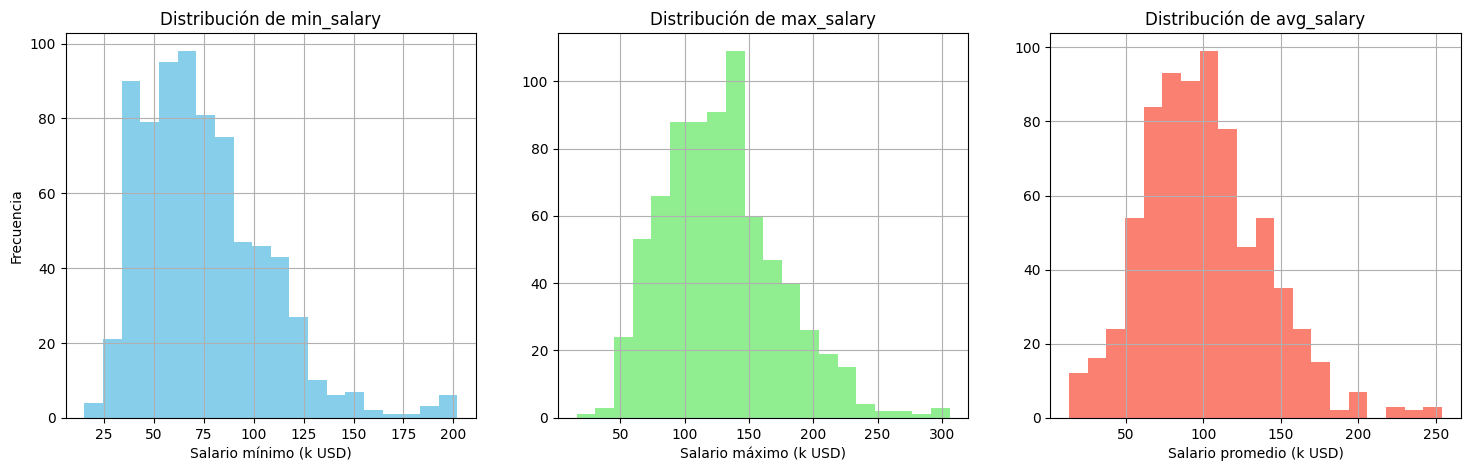

In [138]:
# Histogramas de salarios
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
df['min_salary'].hist(ax=axes[0], bins=20, color='skyblue')
axes[0].set_title('Distribución de min_salary')
axes[0].set_xlabel('Salario mínimo (k USD)')
axes[0].set_ylabel('Frecuencia')

df['max_salary'].hist(ax=axes[1], bins=20, color='lightgreen')
axes[1].set_title('Distribución de max_salary')
axes[1].set_xlabel('Salario máximo (k USD)')

df['avg_salary'].hist(ax=axes[2], bins=20, color='salmon')
axes[2].set_title('Distribución de avg_salary')
axes[2].set_xlabel('Salario promedio (k USD)')
plt.show()

> *Distribución de min_salary:*
> * Se concentra principalmente entre los 50k y 100k USD, con pocos valores por debajo de 40k o por encima de 150k.
> * Esto indica que los salarios mínimos más comunes en ofertas de Data Science rondan ese rango.

> *Distribución de max_salary:*
> * Presenta una forma similar, con un pico entre 100k y 150k USD.
> * A partir de 200k, los valores disminuyen considerablemente, lo que sugiere que los salarios muy altos son menos frecuentes.

> *Distribución de avg_salary:*
> - Tiene un comportamiento asimétrico hacia la derecha, es decir, hay más ofertas con sueldos bajos o medios, y unas pocas con sueldos excepcionalmente altos.
> - Esto es un patrón común en salarios reales, donde pocos puestos ofrecen remuneraciones muy elevadas.

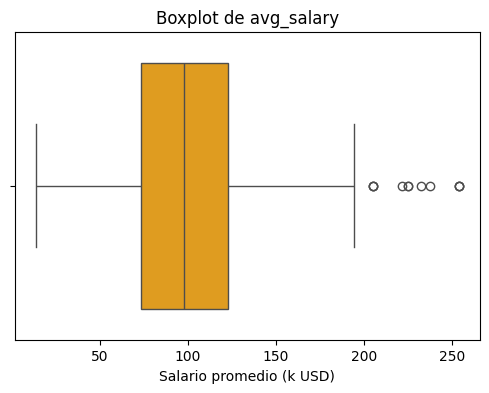

In [139]:
# Boxplot de avg_salary
plt.figure(figsize=(6,4))
sns.boxplot(x=df['avg_salary'], color='orange')
plt.title('Boxplot de avg_salary')
plt.xlabel('Salario promedio (k USD)')
plt.show()

> * La línea del centro representa la mediana y la caja el rango donde se concentra la mayoría de los salarios.
> * Los puntos que vemos fuera son valores atípicos, es decir, ofertas con sueldos mucho más altos que el promedio.
> * Esto confirma que el dataset tiene una ligera inclinación hacia los salarios altos, aunque la mayoría de las ofertas se mantiene entre los 50 y 125 mil dólares.”

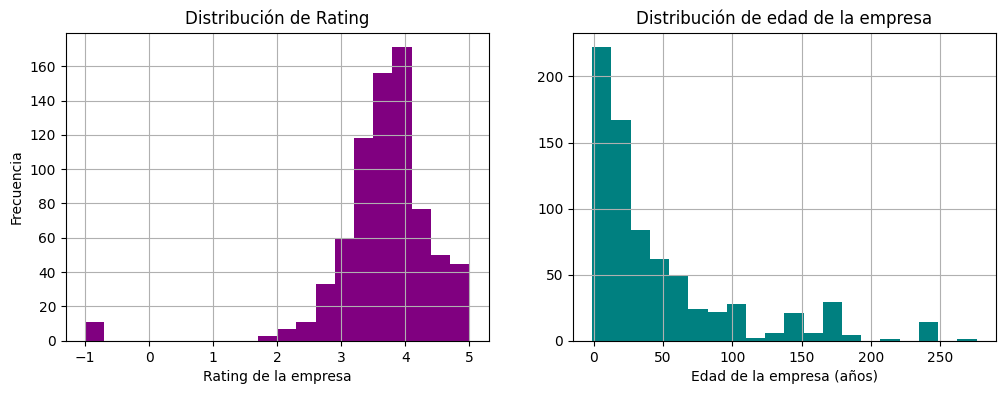

In [140]:

# Histogramas de Rating y age
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
df['Rating'].hist(ax=axes[0], bins=20, color='purple')
axes[0].set_title('Distribución de Rating')
axes[0].set_xlabel('Rating de la empresa')
axes[0].set_ylabel('Frecuencia')

df['age'].hist(ax=axes[1], bins=20, color='teal')
axes[1].set_title('Distribución de edad de la empresa')
axes[1].set_xlabel('Edad de la empresa (años)')

plt.show()


>* Vemos que la mayoría tienen un rating alto, entre 3 y 5, lo que refleja buenas evaluaciones.
>* En cuanto a la edad, la mayor parte de las empresas tienen menos de 50 años, lo que coincide con el perfil de compañías tecnológicas jóvenes.
>* Esta información nos ayuda a entender mejor el tipo de organizaciones que ofrecen los puestos de Data Science y cómo podrían influir en los salarios.”

## 1.4 Análisis de la variable objetivo

La variable que queremos predecir es `avg_salary`, el salario promedio de las ofertas. Analizaremos su distribución con mayor detalle y calcularemos algunas estadísticas adicionales como percentiles y la simetría de la distribución. Estos análisis permitirán decidir si es necesario transformar la variable o tratar los valores atípicos.


In [141]:
# Resumen estadístico de avg_salary
summary = df['avg_salary'].describe()
print("Resumen estadístico de avg_salary:")
print(summary)

Resumen estadístico de avg_salary:
count    742.000000
mean     100.626011
std       38.855948
min       13.500000
25%       73.500000
50%       97.500000
75%      122.500000
max      254.000000
Name: avg_salary, dtype: float64


>* Vemos que la media ronda los 100 mil dólares, con una mediana de 97 mil, lo cual indica una ligera asimetría hacia valores altos.
>* También encontramos salarios muy elevados que podrían ser considerados outliers.
>* Este tipo de comportamiento es común en variables económicas, y nos ayudará a decidir si es necesario aplicar transformaciones antes del entrenamiento del modelo.”

In [142]:
# Calcular percentiles específicos
percentiles = df['avg_salary'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])
print("\nPercentiles cla    ve de avg_salary:")
print(percentiles)


Percentiles cla    ve de avg_salary:
0.05     45.575
0.25     73.500
0.50     97.500
0.75    122.500
0.95    167.500
Name: avg_salary, dtype: float64


>* Vemos que el 50% de las ofertas paga menos de 97 mil dólares, y que solo un 5% supera los 167 mil.
>* Esto confirma que la mayoría de los salarios están concentrados en un rango medio, mientras que pocos valores se van hacia los extremos.
>* Estos datos nos ayudan a entender mejor la variabilidad del salario antes de modelarlo.”

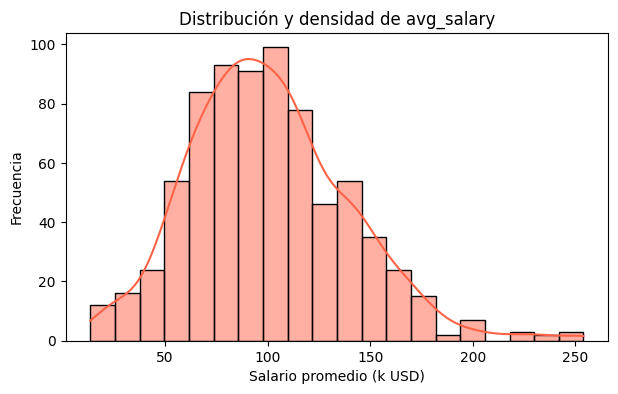

In [143]:
# Histograma estimación de densidad
plt.figure(figsize=(7,4))
sns.histplot(df['avg_salary'], bins=20, kde=True, color='tomato')
plt.title('Distribución y densidad de avg_salary')
plt.xlabel('Salario promedio (k USD)')
plt.ylabel('Frecuencia')
plt.show()

>* En esta gráfica combinamos el histograma con una curva de densidad, que nos muestra la forma real de la distribución del salario promedio.
>* Observamos que la mayoría de los salarios están entre 80 y 120 mil dólares, pero hay una cola hacia la derecha con valores más altos.
>* Esto indica que existen algunas ofertas con sueldos muy elevados que podrían influir en el modelo, por lo que tal vez sea necesario corregir mas adelante

___

# 2. Preprocesamiento de los datos

## 2.1 Limpieza de datos

El objetivo de la limpieza es preparar el dataset para el modelado. En nuestro caso haremos lo siguiente:

1. **Eliminar la columna `Unnamed: 0`** que actúa como índice redundante.
2. **Eliminar columnas no necesarias** para la predicción inmediata, como:
   - `Salary Estimate`: contiene rangos en texto y ya disponemos de `min_salary`, `max_salary` y `avg_salary`.
   - `Job Description`: es texto libre; procesarlo requeriría técnicas de NLP, por lo que lo omitimos en esta fase.
   - `Company Name`, `Location`, `Headquarters`, `Competitors`, `company_txt`: tienen alto número de categorías o no aportan claridad en este momento.
   - `Founded`: la edad de la empresa ya está calculada en `age`.
3. **Eliminar duplicados** para evitar que registros repetidos sesguen el entrenamiento.
4. **Mantener las columnas relevantes** numéricas y categóricas que se usarán más adelante (por ejemplo, `job_state`, `job_simp`, `seniority`, `Type of ownership`, `Industry`, `Sector`, `Revenue`, `Size`, los indicadores binarios y las variables numéricas).


In [144]:
# Copia del DataFrame original para no modificarlo directamente
df_clean = df.copy()

In [145]:
# 1: eliminar la columna 'Unnamed: 0'
if 'Unnamed: 0' in df_clean.columns:
    df_clean = df_clean.drop(columns=['Unnamed: 0'])

>* Primero quitamos la columna Unnamed que basicamente es una columna de un indice y no nos sirve.

In [146]:
# 2: eliminar columnas que no utilizaremos en esta fase
cols_to_drop = ['Salary Estimate', 'Job Description', 'Company Name', 
                'Location', 'Headquarters', 'Competitors', 
                'company_txt', 'Founded']
df_clean = df_clean.drop(columns=cols_to_drop)

>* También eliminamos columnas irrelevantes como ‘Job Description’ o ‘Salary Estimate’, ya que no aportaban datos numéricos para el modelo.

In [147]:
# Paso 4: inspeccionar el DataFrame limpio
print(f"\nColumnas restantes ({len(df_clean.columns)}):")
print(df_clean.columns.tolist())
# Visualizar las primeras filas del DataFrame limpio
df_clean.head()


Columnas restantes (24):
['Job Title', 'Rating', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len', 'num_comp']


,Job Title,Rating,Size,Type of ownership,Industry,Sector,Revenue,hourly,employer_provided,min_salary,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,Data Scientist,3.8,501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,0,53,...,47,1,0,0,0,1,data scientist,na,2536,0
1,Healthcare Data Scientist,3.4,10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0,63,...,36,1,0,0,0,0,data scientist,na,4783,0
2,Data Scientist,4.8,501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD),0,0,80,...,10,1,0,1,0,1,data scientist,na,3461,0
3,Data Scientist,3.8,1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),0,0,56,...,55,1,0,0,0,0,data scientist,na,3883,3
4,Data Scientist,2.9,51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,0,0,86,...,22,1,0,0,0,1,data scientist,na,2728,3


## 2.2 Normalización de los datos

Tras la limpieza, debemos **normalizar** las variables numéricas continuas para que todas estén en escalas comparables. Utilizaremos `MinMaxScaler` de scikit-learn para transformar cada característica de modo que sus valores se sitúen entre 0 y 1

$$ norm = \frac{x - min}{max - min} $$

Columnas numéricas a normalizar:
['Rating', 'age', 'desc_len', 'min_salary', 'max_salary']

,count,mean,std,min,25%,50%,75%,max
Rating,742.0,0.769811,0.133535,0.0,0.716667,0.783333,0.833333,1.0
age,742.0,0.171811,0.194147,0.0,0.043321,0.090253,0.216606,1.0
desc_len,742.0,0.359036,0.157766,0.0,0.248237,0.344670,0.449295,1.0
min_salary,742.0,0.319357,0.165672,0.0,0.197861,0.291444,0.406417,1.0
max_salary,742.0,0.386723,0.155932,0.0,0.275862,0.372414,0.479310,1.0


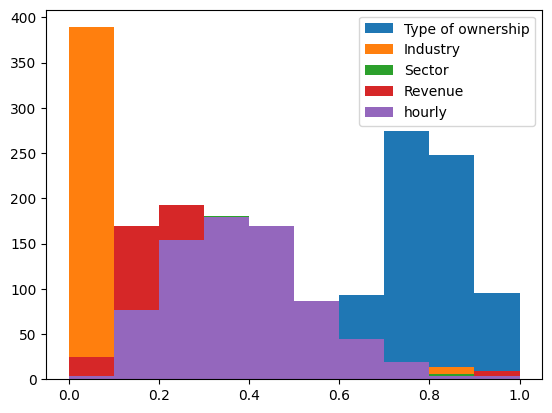

In [148]:
# Seleccionar las columnas numéricas continuas
cols_to_scale = ['Rating', 'age', 'desc_len', 'min_salary', 'max_salary']

# Instanciar el MinMaxScaler (por defecto escala a [0,1])
scaler = MinMaxScaler()

# Ajustar y transformar las columnas seleccionadas
df_clean[cols_to_scale] = scaler.fit_transform(df_clean[cols_to_scale])

# Visualizar histogramas de las columnas escaladas
for i in range(df_clean[cols_to_scale].shape[1]):
    plt.hist(df_clean[cols_to_scale].values[:, i], label = [df_clean.columns[3 + i]])

plt.legend()

# Verificar el resultado: todas las columnas deberían tener valores en [0,1]
df_clean[cols_to_scale].describe().T


## 2.3 Categorización de la variable objetivo

Nuestro problema es de **regresión**: queremos predecir el salario promedio (`avg_salary`) como un valor continuo. Por tanto, **no realizaremos** ninguna categorización de la variable objetivo.  
Si se tratase de un problema de clasificación, podríamos dividir `avg_salary` en rangos (por ejemplo, bajo, medio y alto) y asignar etiquetas, pero aquí no se aplica.


## 2.4 Balanceo de clases

El balanceo de clases se aplica en problemas de clasificación para evitar que el modelo se incline hacia la clase mayoritaria. Al ser un problema de regresión (predicción de un valor continuo), **no es necesario** aplicar técnicas de balanceo.  
Por tanto, omitimos este paso.


## 2.5 División del conjunto de datos

Una vez limpios y normalizados los datos, debemos dividir el dataset en conjuntos de entrenamiento, validación y prueba. Usaremos los siguientes pasos:

1. **Codificación de variables categóricas** mediante one-hot encoding (`pd.get_dummies`) para convertirlas en variables numéricas.
2. **Dividir** el conjunto resultante en tres subconjuntos:
   - 70 % para entrenamiento
   - 15 % para validación
   - 15 % para prueba


In [149]:
# Definir la variable objetivo y las características
y = df_clean['avg_salary']
X = df_clean.drop(columns=['avg_salary'])

# 1: Codificación de variables categóricas usando one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# 2: Primera división (entrenamiento vs. temporal validación/prueba)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_encoded, y, test_size=0.30, random_state=42)

# Segunda división: validación y prueba (cada una 15 % del total)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42)

# Mostrar el tamaño de cada conjunto resultante
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_val.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Tamaño del conjunto de entrenamiento: (519, 435)
Tamaño del conjunto de validación: (111, 435)
Tamaño del conjunto de prueba: (112, 435)


# 3. Implementación de la red neuronal artificial
## 3.1 Diseño de la arquitectura

Basándonos en la red multicapa, diseñaremos una red neuronal densa con tres capas ocultas de **128, 128 y 64 neuronas** y función de activación *ReLU*. La salida será una sola neurona con activación **lineal**, adecuada para regresión.  
Para su implementación utilizaremos Keras (de TensorFlow) y mantendremos las variables preprocesadas (`X_train`, `X_val`, `X_test`, `y_train`, `y_val`, `y_test`) generadas en el Punto 2.


In [150]:
# Asegurarse de que X_train está en el entorno
n_features = X_train.shape[1]

# Construir el modelo secuencial con la arquitectura del Ejercicio 6
model = Sequential([
    Dense(128, activation='relu', input_shape=(n_features,)),  # 1ª capa oculta
    Dense(128, activation='relu'),                             # 2ª capa oculta
    Dense(64, activation='relu'),                              # 3ª capa oculta
    Dense(1, activation='linear')                              # Capa de salida para regresión
])

# Resumen del modelo para comprobar el número de parámetros
model.summary()


c:\Users\juanp\Programacion\Redes-Neuronales-Notebook\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │        55,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,641 (315.00 KB)

 Trainable params: 80,641 (315.00 KB)

 Non-trainable params: 0 (0.00 B)

## 3.2 Implementación y entrenamiento del modelo

Compilaremos la red con la **función de pérdida MSE (error cuadrático medio)** y el optimizador **Adam**. Como métrica adicional incluimos el **MAE** para tener una interpretación en miles de dólares.  
Usaremos **early stopping** para detener el entrenamiento si la pérdida de validación deja de mejorar tras 10 épocas. Ajustamos el número máximo de épocas a 200 y un tamaño de lote (`batch_size`) de 32, como en los ejemplos de clase.


In [151]:
# Compilación del modelo con MSE como pérdida y MAE como métrica
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

# Configuración de early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Entrenamiento del modelo
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=200,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 10968.2324 - mae: 97.1346 - val_loss: 11114.8975 - val_mae: 98.3540
Epoch 2/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7511.6685 - mae: 77.5141 - val_loss: 3582.3997 - val_mae: 48.9869
Epoch 3/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1691.6752 - mae: 32.9723 - val_loss: 1264.3196 - val_mae: 29.4286
Epoch 4/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 974.2776 - mae: 24.2970 - val_loss: 1045.9827 - val_mae: 25.0794
Epoch 5/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 757.3862 - mae: 21.4663 - val_loss: 748.2993 - val_mae: 21.5493
Epoch 6/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 591.1494 - mae: 18.3810 - val_loss: 647.8601 - val_mae: 19.2820
Epoch 7/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 477.0769 - mae: 16.2535 - val_loss: 544.8375 - val_mae: 17.5841
Epoch 8/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 403.1604 - mae: 14.7708 - val_loss: 485.7063 - val_mae: 16.2977

## 3.3 Función de pérdida y optimizador

- **Función de pérdida (loss):** Usamos **error cuadrático medio (MSE)** porque penaliza fuertemente las diferencias grandes entre el salario real y el predicho y es el estándar para problemas de regresión.
- **Métrica de evaluación:** Añadimos el **error absoluto medio (MAE)** para interpretar el error en las mismas unidades del salario (miles de dólares).
- **Optimizador:** Elegimos **Adam**, que ajusta automáticamente la tasa de aprendizaje y suele converger rápido para este tipo de redes densas.


## 3.4 Evaluación de la red

Una vez entrenada, evaluaremos la red en el conjunto de prueba (`X_test`, `y_test`). Calcularemos:

- **MSE** y **MAE** sobre el conjunto de prueba.
- **Coeficiente de determinación**, que mide la proporción de variabilidad explicada por el modelo (un \(R^2 > 0.80\) significa que la red predice más del 80 % de la variación del salario).
- Curvas de pérdida (MSE) y MAE para detectar sobreajuste o subajuste.
- Ejemplos de predicción vs. valor real para visualizar la calidad del modelo.


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Error cuadrático medio (MSE) en prueba: 83.96
Error absoluto medio (MAE) en prueba: 4.87
Coeficiente de determinación (R²) en prueba: 0.9375


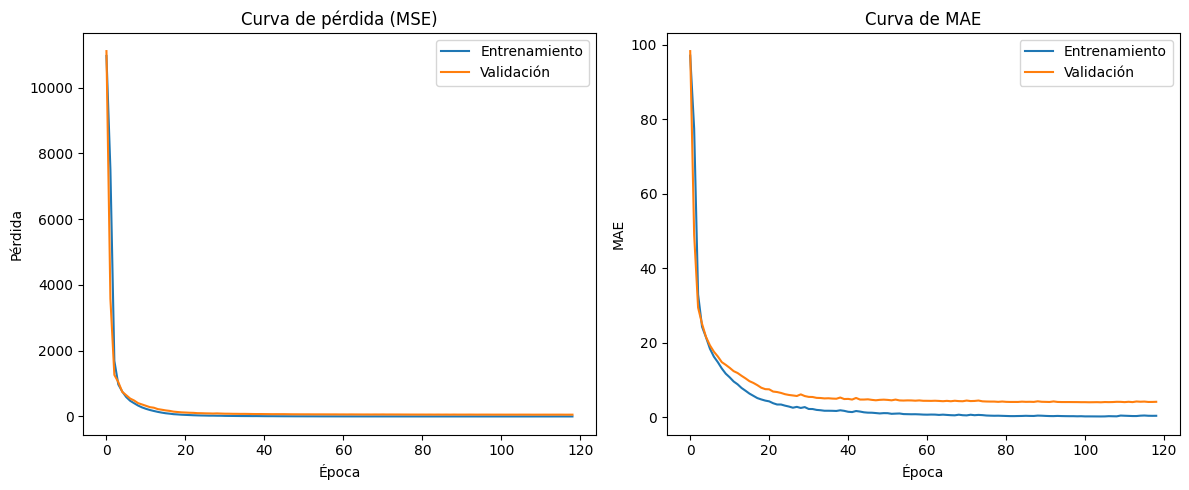

,Real,Predicho
0,51.5,51.749180
1,86.0,99.826180
2,76.0,69.695618
3,97.5,94.134262
4,107.0,107.322014


In [152]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test).flatten()

# Calcular R²
r2 = r2_score(y_test, y_pred)

# Mostrar métricas
print(f"Error cuadrático medio (MSE) en prueba: {test_loss:.2f}")
print(f"Error absoluto medio (MAE) en prueba: {test_mae:.2f}")
print(f"Coeficiente de determinación (R²) en prueba: {r2:.4f}")

# Graficar curvas de pérdida y MAE
plt.figure(figsize=(12,5))

# Pérdida MSE
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Curva de pérdida (MSE)')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

# MAE
plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='Entrenamiento')
plt.plot(history.history['val_mae'], label='Validación')
plt.title('Curva de MAE')
plt.xlabel('Época')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

# Comparar algunas predicciones con valores reales
comparison = pd.DataFrame({
    'Real': y_test.values,
    'Predicho': y_pred
})
comparison.head()
